In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
data_train = pd.read_csv('csv/train_losses.csv')
data_test = pd.read_csv('csv/test_losses.csv')
data_train_reversed = pd.read_csv('csv/train_losses_reversed.csv')
data_test_reversed = pd.read_csv('csv/test_losses_reversed.csv')
data_train_reversed_no_dropout = pd.read_csv('csv/train_losses_reversed_no_dropout.csv')
data_test_reversed_no_dropout = pd.read_csv('csv/test_losses_reversed_no_dropout.csv')
data_train_no_dropout = pd.read_csv('csv/train_losses_no_dropout.csv')
data_test_no_dropout = pd.read_csv('csv/test_losses_no_dropout.csv')

In [17]:
import matplotlib.pyplot as plt

def compare_losses(train, test, title):
    # Utiliser un style prédéfini pour un rendu plus professionnel
    sns.set_style("darkgrid")
    
    # Créer la figure
    plt.figure(figsize=(10, 6))
    
    # Tracer les courbes de perte
    plt.plot(train['epoch'], train['train_loss'], label='Train Loss', 
             color='blue', linestyle='-', linewidth=2, marker='o', markersize=8)
    plt.plot(test['epoch'], test['test_loss'], label='Test Loss', 
             color='red', linestyle='--', linewidth=2, marker='s', markersize=8)
    
    # Ajouter des labels et un titre
    plt.xlabel('Epoch', fontsize=14, fontweight='bold')
    plt.ylabel('Loss', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold')
    
    # Ajouter une grille
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Ajouter une légende
    plt.legend(fontsize=12, frameon=True, shadow=True, borderpad=1)
    
    # Ajuster les limites de l'axe des y pour éviter des pertes coupées
    plt.ylim(bottom=0)
    
    # Afficher le graphique
    plt.tight_layout()  # Pour éviter les chevauchements
    plt.show()

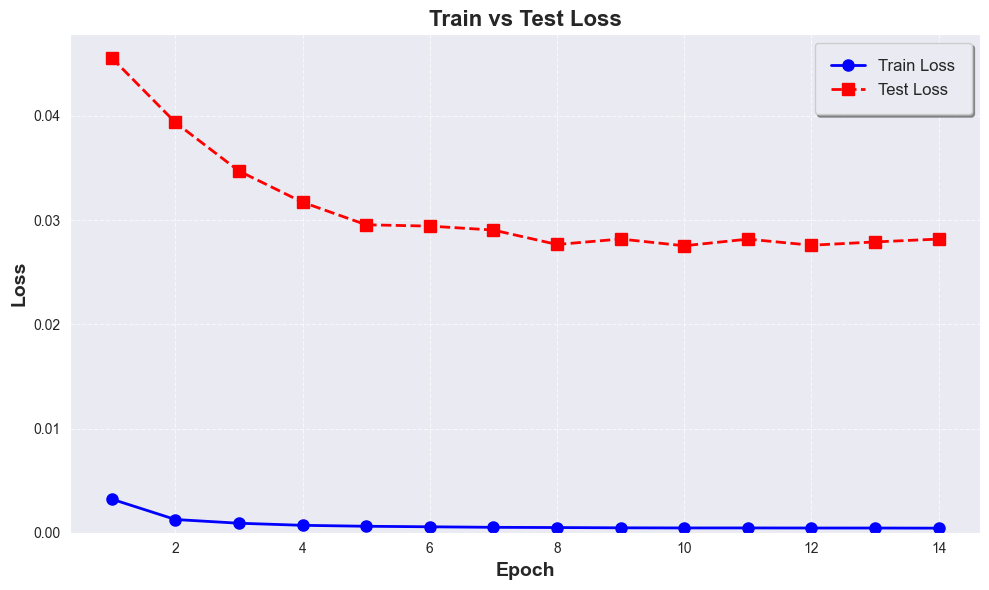

In [18]:
compare_losses(data_train, data_test, 'Train vs Test Loss')

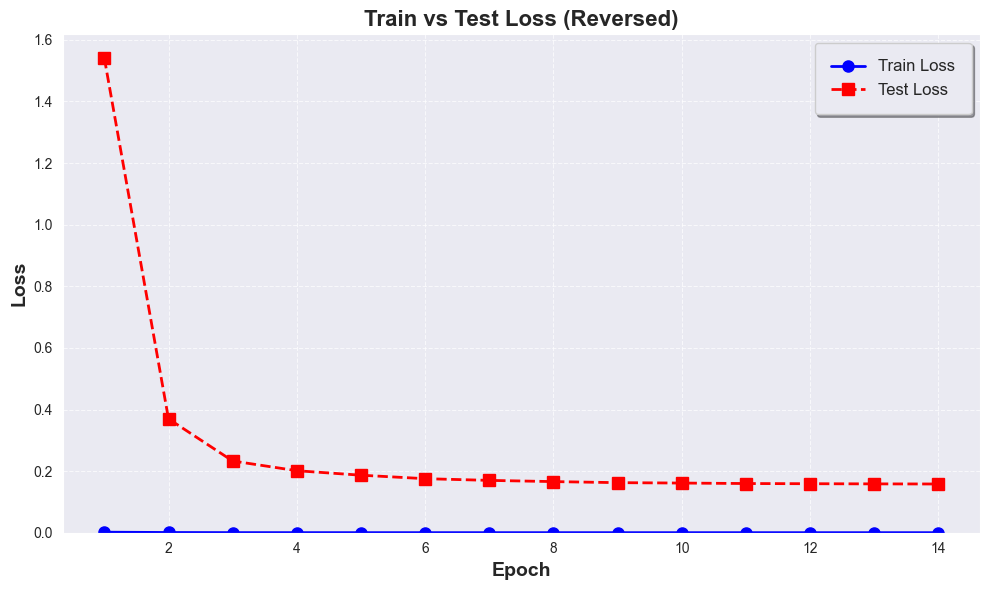

In [19]:
compare_losses(data_train_reversed, data_test_reversed, 'Train vs Test Loss (Reversed)')

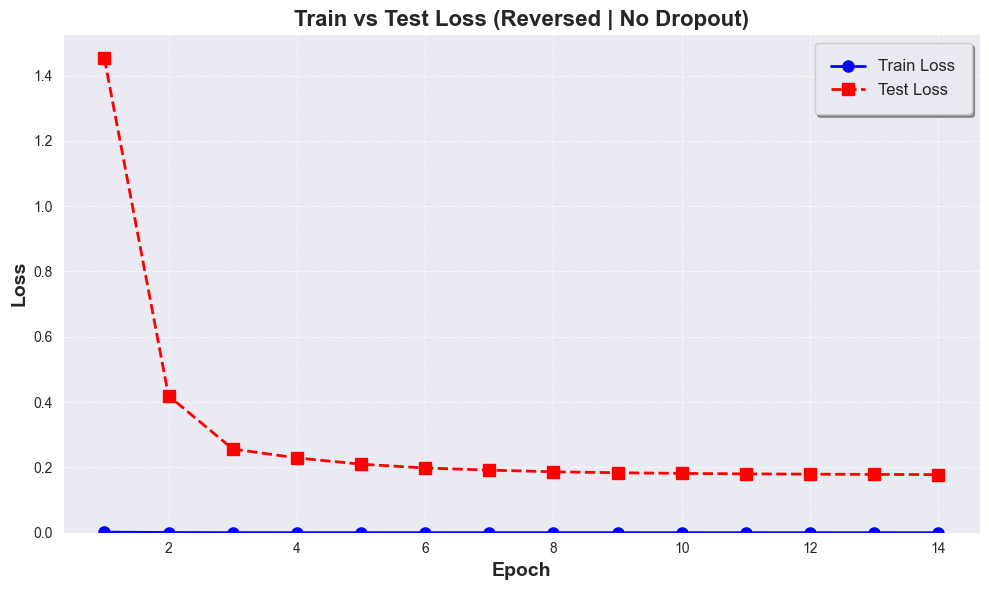

In [20]:
compare_losses(data_train_reversed_no_dropout, data_test_reversed_no_dropout, 'Train vs Test Loss (Reversed | No Dropout)')

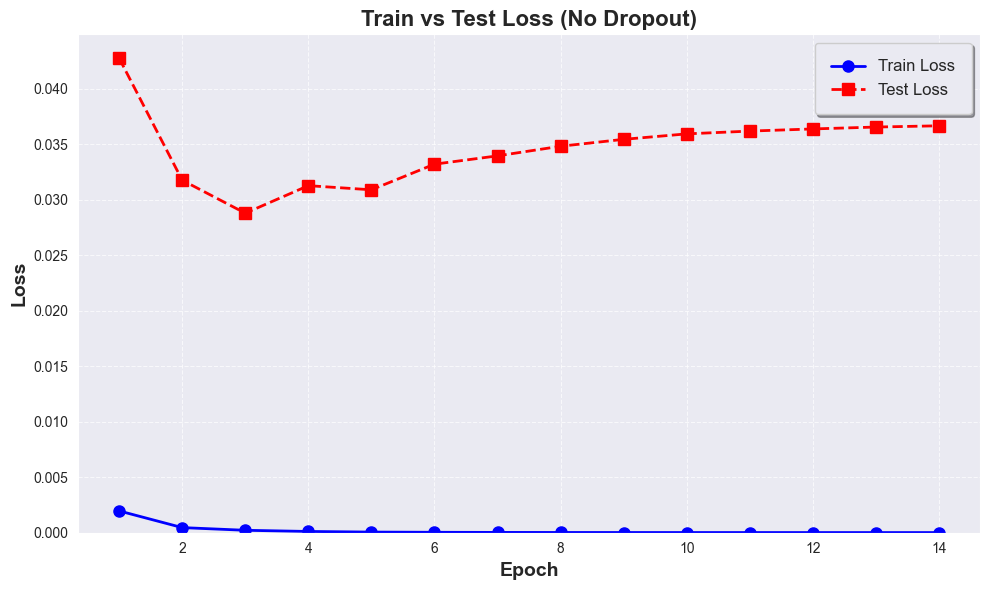

In [21]:
compare_losses(data_train_no_dropout, data_test_no_dropout, 'Train vs Test Loss (No Dropout)')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_losses(data, data_reversed, data_reversed_no_dropout, data_no_dropout, mode):
    # Appliquer un style professionnel
    sns.set_style("darkgrid")
    
    # Créer la figure
    plt.figure(figsize=(12, 8))
    
    # Tracer les courbes de perte
    plt.plot(data['epoch'], data[f'{mode}_loss'], 
             label=f'{mode} Loss', 
             color='blue', linestyle='-', linewidth=2, marker='o', markersize=8)
    plt.plot(data_reversed['epoch'], data_reversed[f'{mode}_loss'], 
             label=f'{mode} Loss (Reversed)', 
             color='green', linestyle='--', linewidth=2, marker='s', markersize=8)
    plt.plot(data_reversed_no_dropout['epoch'], data_reversed_no_dropout[f'{mode}_loss'], 
             label=f'{mode} Loss (Reversed | No Dropout)', 
             color='red', linestyle='-.', linewidth=2, marker='^', markersize=8)
    plt.plot(data_no_dropout['epoch'], data_no_dropout[f'{mode}_loss'], 
             label=f'{mode} Loss (No Dropout)', 
             color='purple', linestyle=':', linewidth=2, marker='D', markersize=8)
    
    # Utiliser une échelle logarithmique pour l'axe des Y
    plt.yscale('log')
    
    # Ajouter des labels et un titre
    plt.xlabel('Epoch', fontsize=14, fontweight='bold')
    plt.ylabel('Loss (log scale)', fontsize=14, fontweight='bold')
    plt.title(f'{mode} Loss Comparison', fontsize=16, fontweight='bold')
    
    # Ajouter une légende
    plt.legend(fontsize=12, frameon=True, shadow=True, borderpad=1, loc='upper right')
    
    # Ajouter une grille
    plt.grid(True, which="both", ls="--", alpha=0.7)
    
    # Ajuster les limites de l'axe des Y pour une meilleure visualisation
    plt.ylim(bottom=min(data[f'{mode}_loss'].min(), 
                        data_reversed[f'{mode}_loss'].min(), 
                        data_reversed_no_dropout[f'{mode}_loss'].min(), 
                        data_no_dropout[f'{mode}_loss'].min()) * 0.9, 
             top=max(data[f'{mode}_loss'].max(), 
                    data_reversed[f'{mode}_loss'].max(), 
                    data_reversed_no_dropout[f'{mode}_loss'].max(), 
                    data_no_dropout[f'{mode}_loss'].max()) * 1.1)
    
    # Afficher le graphique
    plt.tight_layout()
    plt.show()

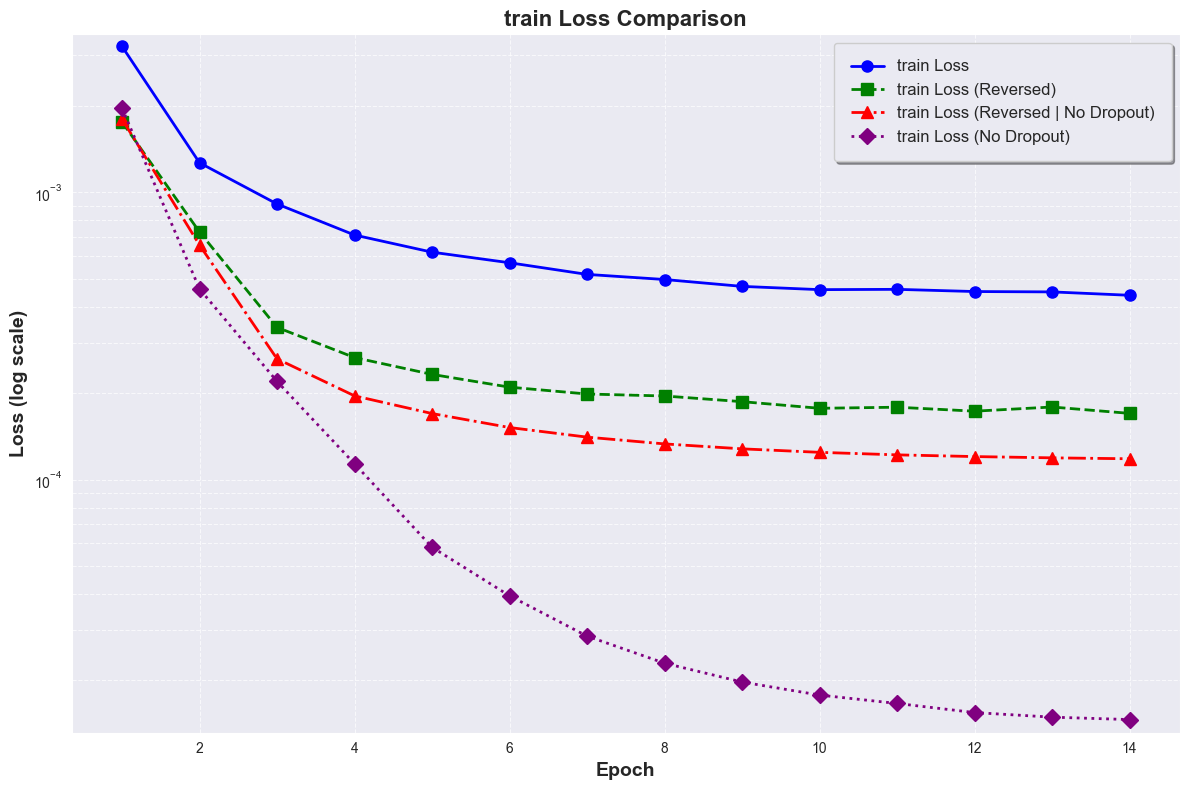

In [23]:
compare_losses(data_train, data_train_reversed, data_train_reversed_no_dropout, data_train_no_dropout, 'train')

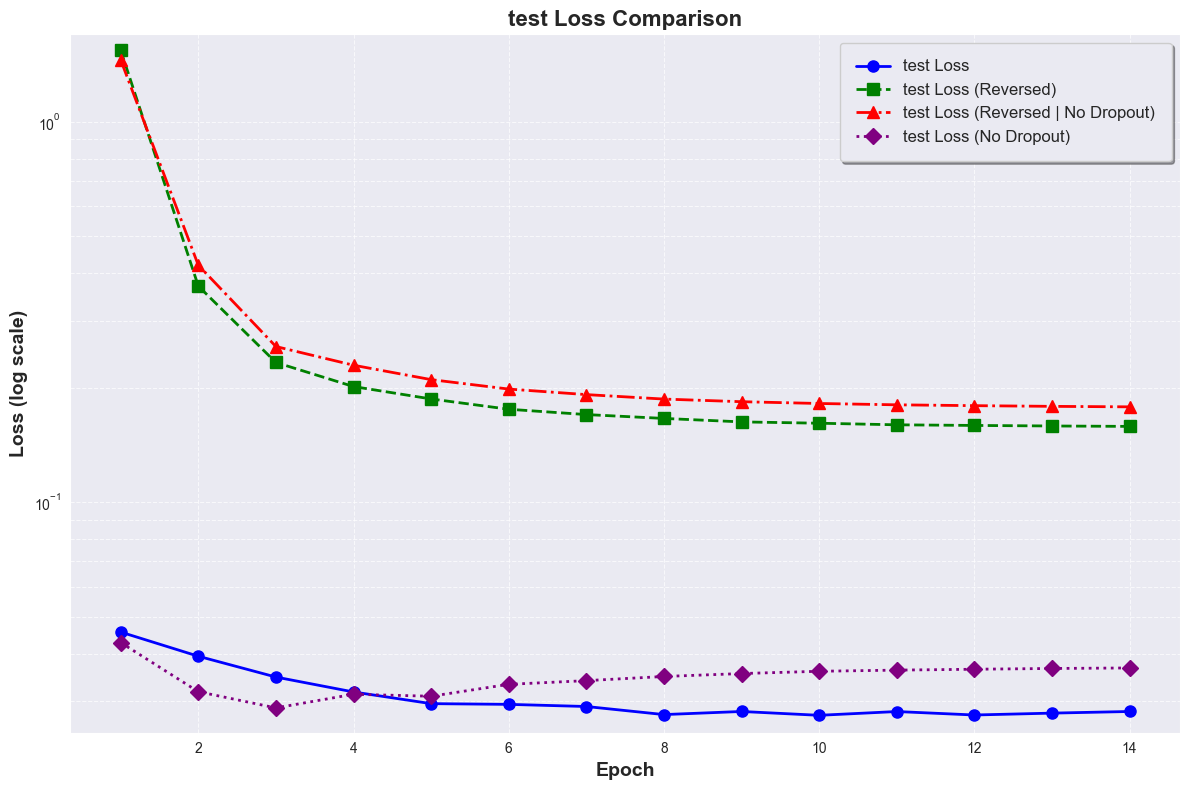

In [24]:
compare_losses(data_test, data_test_reversed, data_test_reversed_no_dropout, data_test_no_dropout, 'test')